# Google colab setup

In [69]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [70]:
import os
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/computerVision/Cw' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['CW_Dataset.zip', '.ipynb_checkpoints', 'HOG_SVM.joblib', 'HOG_MLP.joblib', 'HOG_RFC.joblib', 'test', 'Kmeans.joblib', 'SIFT_SVM', 'SIFT_MLP', 'SIFT_RFC', 'inTheWild', 'training_SIFT_models.ipynb', 'training_HOG_models.ipynb', 'EmotionRecognition.ipynb']


In [71]:
!pip install opencv-python==4.4.0.46

# Introduction
This file implements the EmotionRecognition funtion that that allows to
visualise qualitative results (i.e., predictions) obtained with the different models on the test set images

4 random images from the test set must be displayed together with the
model’s predictions and the ground-truth labels.

it can also be used for Facial Emotion Recognition on images “in the wild”. 

Trained models that are available are HOG-SVM, HOG-MLP, HOG-Random Forest, SIFT-SVM, SIFT-MLP and SIFT-Random Forest 



In [72]:
from joblib import load
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.feature import hog
from sklearn import svm, metrics
from skimage import img_as_ubyte, io, color
import cv2

# EmotionRecognition()

the EmotionRecognition function takes 2 parameter syntax being path_to_testset is a string pointing at the test set of the provided dataset and
model_type is a string used to select a given model

In [74]:
### EMOTIONRECOGNITION FUNCTION###
# model type : "HOG-SVM" "HOG-MLP", "HOG-RFC", "SIFT-SVM", "SIFT-MLP", "SIFT-RFC"

def EmotionRecognition(path_to_testset, model_type):
  path= path_to_testset
  print("1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral")

#### LOAD THE DATASET ######
  test_images=[]
  test_labels=[]
  #predicted= []
  for file in sorted(os.listdir(path)):
    if file.endswith('.txt'):
      data = np.genfromtxt(path + '/' + file)    #txt file to np
      labels = data[:,1]
      labels = labels.astype(int)    #convert label to int
      test_labels = labels.tolist()   #add to the label list
    if file.endswith('.jpg'):
      image = io.imread(os.path.join(path,file))     #read the image
      test_images.append(image)    #add it to the images list

  # shuffle for randomnness
  if len(test_labels)==0 :
    test_images = shuffle(test_images)
  else:
    test_images, test_labels = shuffle(test_images,test_labels)

### HOG MODELS ####
  if model_type.startswith('HOG'):
    #extracts hog features of 4 random images
    X_test = []
    #y_test = []
    
    for i in range(4):
      image = test_images[i]
      HOG_des, HOG_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
      X_test.append(HOG_des)
     
    #load and test the selected classifer
    if model_type == 'HOG-SVM':
      #load the classifer
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/HOG_SVM.joblib')
      predicted = classifier.predict(X_test).tolist()
      print("Model: HOG-SVM")


    if model_type == 'HOG-MLP':
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/HOG_MLP.joblib')
      predicted = classifier.predict(X_test).tolist()
      print("Model: HOG-MLP")
    
    if model_type == 'HOG-RFC':
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/HOG_RFC.joblib')
      predicted = classifier.predict(X_test).tolist()
      print("Model: HOG-Random Forest Classifier")

######## SIFT MODELS #################
  if model_type.startswith('SIFT'):

    #load teh saved Kmeans
    Kmeans = load('drive/My Drive/Colab Notebooks/computerVision/Cw/Kmeans.joblib')

    #extract SIFT fetaures of 4 random images
    sift = cv2.SIFT_create()
    SIFT_descriptors = []
    #SIFT_labels = []
    for i in range(4):
      img= img_as_ubyte(color.rgb2gray(test_images[i]))
      kp, des = sift.detectAndCompute(img,None)
      SIFT_descriptors.append(des)
      #SIFT_labels.append(test_labels[i])

    # histogram codewords
    hist_list=[]
    k = 70
    for des in SIFT_descriptors:
       
      hist = np.zeros(k)
      idx= Kmeans.predict(des)

      for j in idx:
        hist[j] = hist[j] + (1/len(des))
      hist_list.append(hist)
    
    
    X_test = np.vstack(hist_list)
    #test_labels = SIFT_labels
    #load and test the selected classifer
  
    if model_type=='SIFT-SVM':
      
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/SIFT_SVM')
      predicted = classifier.predict(X_test).tolist()
      print("Model: SIFT-SVM")

    if model_type == 'SIFT-MLP':
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/SIFT_MLP')
      predicted = classifier.predict(X_test).tolist()
      print("Model: SIFT-MLP")

    if model_type == 'SIFT-RFC':
      classifier = load('drive/My Drive/Colab Notebooks/computerVision/Cw/SIFT_RFC')
      predicted = classifier.predict(X_test).tolist()
      print("Model: SIFT-Random Forest Classifier")

  fig, ax = plt.subplots(1, 4, figsize=(10, 8), sharey=True)

  for i in range(4):
    ax[i].imshow(test_images[i])
    if len(test_labels) == 0:
      ax[i].set_title(f'Prediction: {predicted[i]}')
    else:
      ax[i].set_title(f'Prediction: {predicted[i]}\n Ground Truth: {test_labels[i]}')
    ax[i].set_axis_off()


  fig.tight_layout()
  plt.show()  


# Test on test set

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-SVM


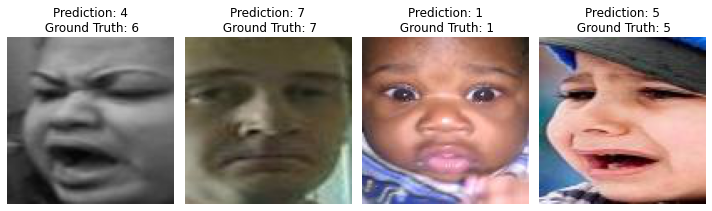

In [75]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "HOG-SVM")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-MLP


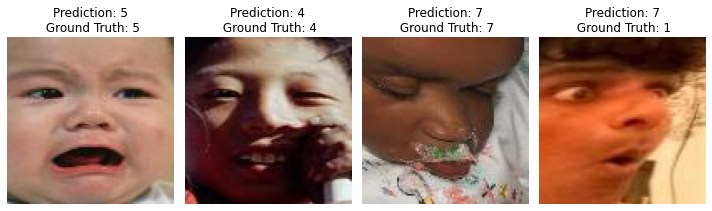

In [76]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "HOG-MLP")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-Random Forest Classifier


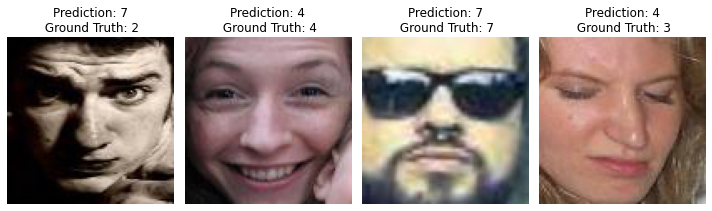

In [77]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "HOG-RFC")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-SVM


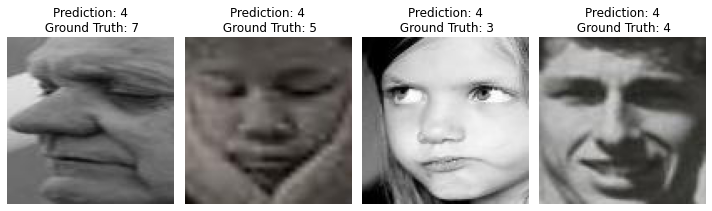

In [78]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "SIFT-SVM")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-MLP


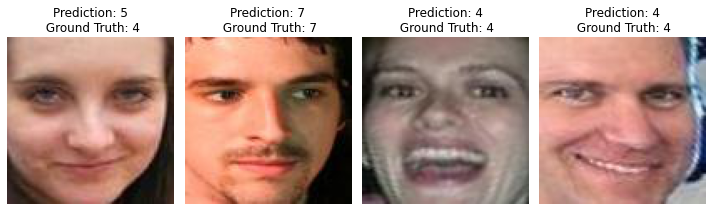

In [79]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "SIFT-MLP")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-Random Forest Classifier


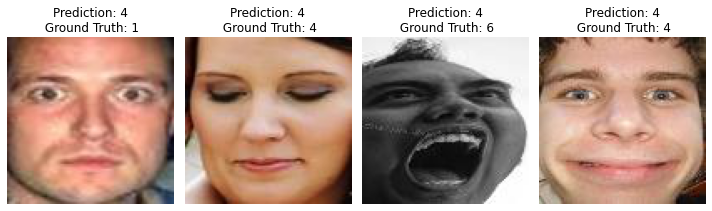

In [80]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/test', "SIFT-RFC")

# Test on inTheWild

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-SVM


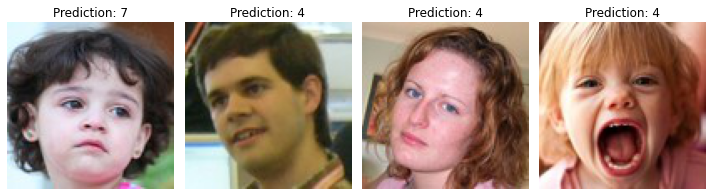

In [89]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "SIFT-SVM")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-MLP


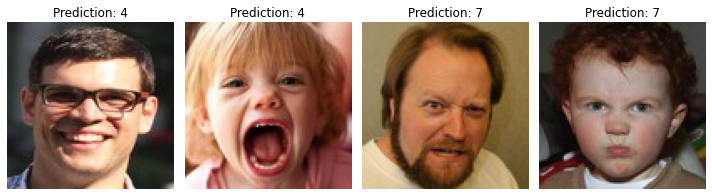

In [82]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "SIFT-MLP")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: SIFT-Random Forest Classifier


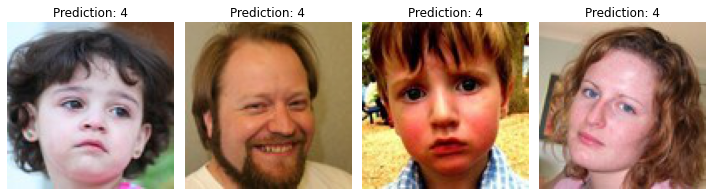

In [83]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "SIFT-RFC")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-SVM


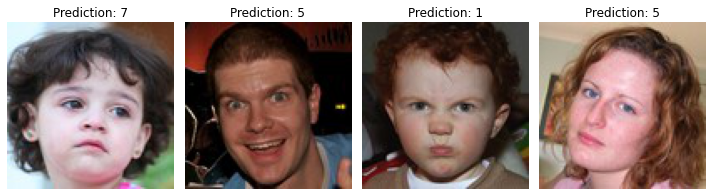

In [84]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "HOG-SVM")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-MLP


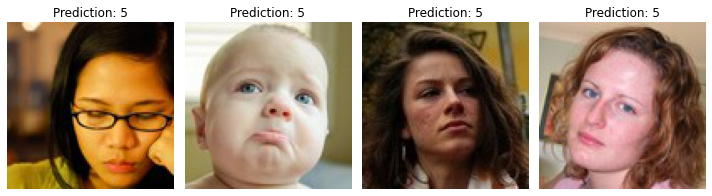

In [85]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "HOG-MLP")

1= Surprise, 2= Fear, 3= Disgust, 4= Happiness, 5= Sadness, 6= Anger, 7= Neutral
Model: HOG-SVM


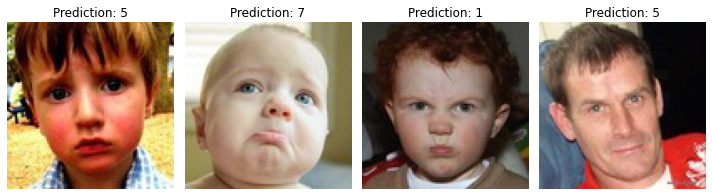

In [86]:
EmotionRecognition('drive/My Drive/Colab Notebooks/computerVision/Cw/inTheWild', "HOG-SVM")